# **Lab 4- Frequency Domain**
# **Computer Vision (10224)**
<img src='https://upload.wikimedia.org/wikipedia/he/thumb/9/94/%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg/560px-%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg'></img>	

## **Goals**
* Practical introduction to the frequencey domain 
* 1D - Fourier transform sinusoidal and super-position 
* 2D - Fourier transform with numpy 
* Imaginary and Real numbers 

## **Preparatory report**
* No preparatory required for this lab 


## **Lab Session**
1. 1D -Fourier Transform
  * Create a 1D sine wave: 
  * Apply fourier transform on the signal you created above
  * Use FFT shift to shift the DC of fourier result to the center of the figure 
  * Compossition of N signals 
2. 2D - Fourier Transfom
  * Sinewaves: 
    * Create 2D cosine wave
    * Create a sine wave with fx and fy - spatial frequencies 
    * Apply Fourier transform on the image you created above 
  * Fourier on a real life image 
    * Free the thinking man 
      * Using L1 Norm 
      * Using L2 Norm
  * Seperate Horizontal and Vertical frequencies 

    

## **Final report** 
* Final report submission is not required for this lab 




## Properties of Discrete Fourier Transform 
<img src ="https://media.cheggcdn.com/media/1ea/1ea62437-5b75-49ef-afc7-cea41fd75879/phpnGqxkX.png"></img>





## Common Discrete Fourier Transforms
<img src = "https://files.transtutors.com/questions/transtutors004/images/transtutors004_cce95462-1bb4-4d61-b2d8-9c0e285f5e10.png"></img>

## Commmon Transform (in Continues Domain): 
<img src = "http://measurebiology.org/w/images/thumb/7/7c/TimeFrequencyDomains_MoreTransformPairsTable.png/500px-TimeFrequencyDomains_MoreTransformPairsTable.png"></img>

## Imports

In [4]:
import cv2
import numpy as np
import numpy.fft as fft
import matplotlib as mpl

import matplotlib.pyplot as plt
from google.colab import drive

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 5)
mpl.rcParams['image.cmap'] = "gray"

# **1D Fourier Transform** 

## Fourier on 1D Signal

### Sample grid 1D

In [5]:
N = 2048  # number of samples
x = np.linspace(0, 1, N)

### Create a Sine wave


In [35]:
# Define amplitude, frequency, and phase of a 1-D Sine wave
A = 127
f = 16
phi = 0
y = # #Your Turn: 1D cosine 


### Show 1D Sine wave

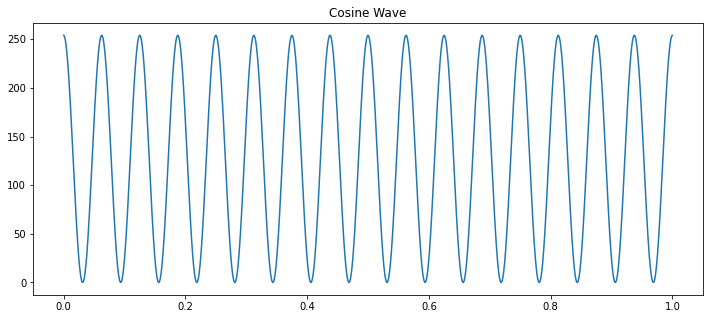

In [36]:
plt.plot(x, y); plt.title('Cosine Wave');

### 1-D Fourier Transform 

In [37]:
Y = fft.fft(y)

### show 1D fourier transform 

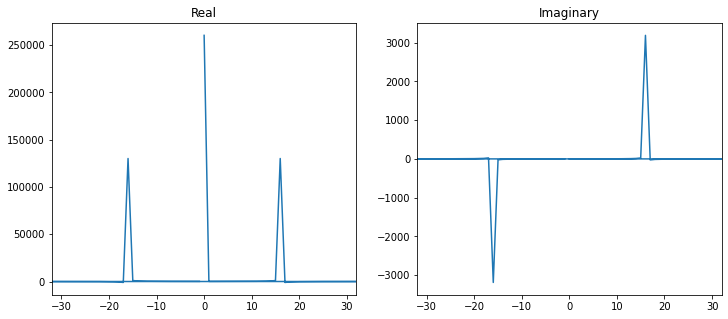

In [38]:
plt.subplot(1,2,1)
plt.plot(fft.fftfreq(N)*N, Y.real);plt.xlim(-32, 32);
plt.title('Real');
plt.subplot(1,2,2)
plt.plot(fft.fftfreq(N)*N, Y.imag); plt.xlim(-32, 32); 
plt.title('Imaginary');

### **1D Fourier Transform Discrete View** 
view the result of Fourier Transform in a bar diagram 
view the result of a single cycle between [-N/2 , N/2]

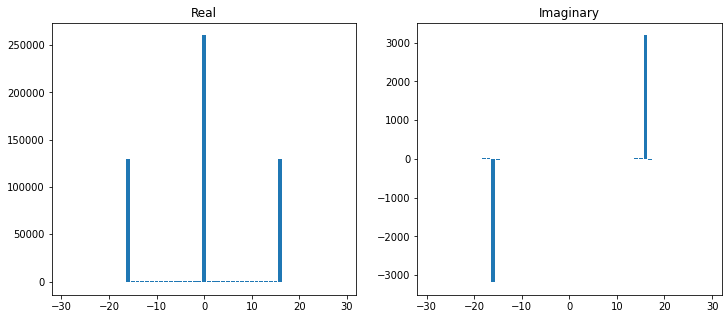

In [39]:

plt.subplot(1,2,1)
plt.bar(fft.fftfreq(N)*N, Y.real); plt.xlim(-32, 32);
plt.title('Real');
plt.subplot(1,2,2)
plt.bar(fft.fftfreq(N)*N, Y.imag); plt.xlim(-32, 32); 
plt.title('Imaginary');



In [ ]:
### FFT  shift. 

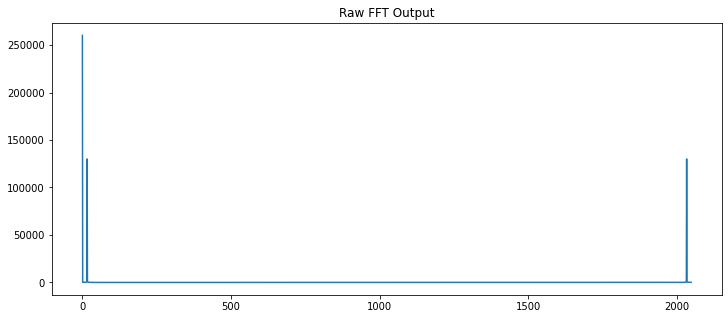

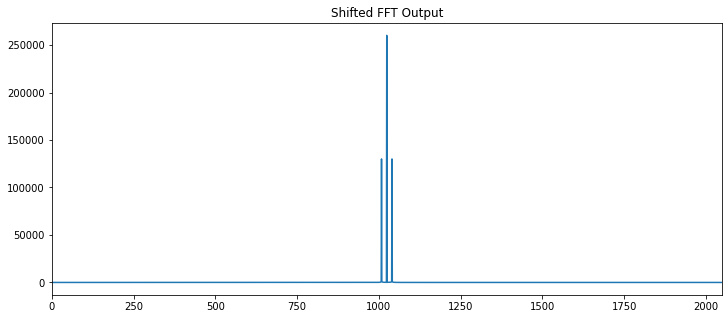

In [43]:

plt.plot(np.abs(Y)) 
plt.title('Raw FFT Output');

plt.figure();

plt.plot(np.abs(fft.fftshift(Y))); plt.xlim(0,N);
plt.title('Shifted FFT Output');

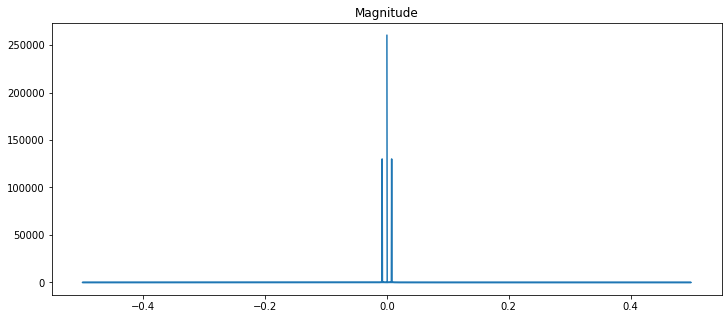

In [45]:
plt.plot(fft.fftfreq(N), np.abs(Y)); plt.title('Magnitude');

### Super position: Mixed Sinusoid
create a singal which is the sum of 3 Sine waves each with different amplitue, frequencey and phase

In [46]:
# Define amplitude, frequency, and phase of a 1-D cosine wave
A = np.array([127, 63, 31]) / 2 
F = [8, 64, 256]
Phi = [0, np.pi/8, np.pi/6]
y = np.sum([a * np.cos(2 * np.pi * f * x + phi) \
            for a, f, phi in zip(A, F, Phi)], axis=0)
y = 127 + y #fit to a range of [0-255] 


### View the signal (Sum of three sinusoids) 

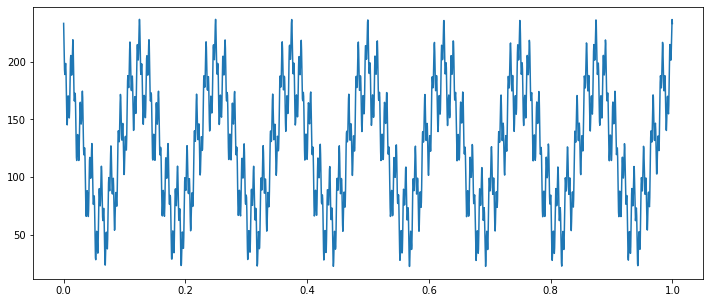

In [47]:
plt.plot(x, y);

### View Fourier of sum of signals 

Text(0.5, 1.0, 'Imaginary')

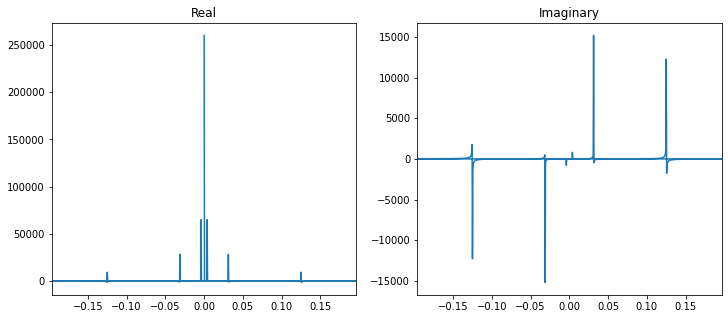

In [49]:

Y = fft.fft(y)
plt.subplot(1,2,1)
plt.plot(fft.fftfreq(N), Y.real); plt.xlim(-np.pi/16, np.pi/16)
plt.title('Real')
plt.subplot(1,2,2)
plt.plot(fft.fftfreq(N), Y.imag); plt.xlim(-np.pi/16, np.pi/16);
plt.title('Imaginary')

# **2D Horizontal Signals**

* Create a 1D Signal then use <code>np.repeat()</code> to repeat it <br> according to the desired number of rows times 
* Reshape the repeated image to be of shape NxN (**results a Vertical sinusoid**)
* Transpose the image to retrive a horizontal sinusoid  


### Create 2D cosine

In [ ]:
N = 512 
x = np.linspace(0, 1, N)
A = 127
f = 8
phi = 0
# Your Turn
# Your Turn (repeat 1D cosine)

### Plot 2D cosine

Text(0.5, 1.0, '2D cosine wave')

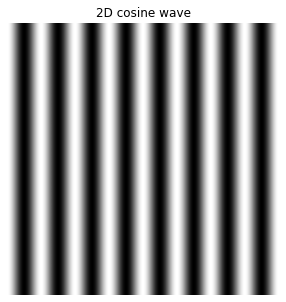

In [173]:
plt.imshow(img)
plt.axis('off')
plt.title('2D cosine wave')


### Assitance function: normalize img<br>
set image type to float32 and normalize it's values to the range of [0, 1] 



In [51]:
def norm(img):
    img = img.astype(np.float32)
    img -= img.min()
    img /= img.max()
    return img

## 2D Fourier of 2D cosine wave

### Fourier transform of a single row of the image 

Text(0.5, 1.0, 'Abs Fourier signle row of the image')

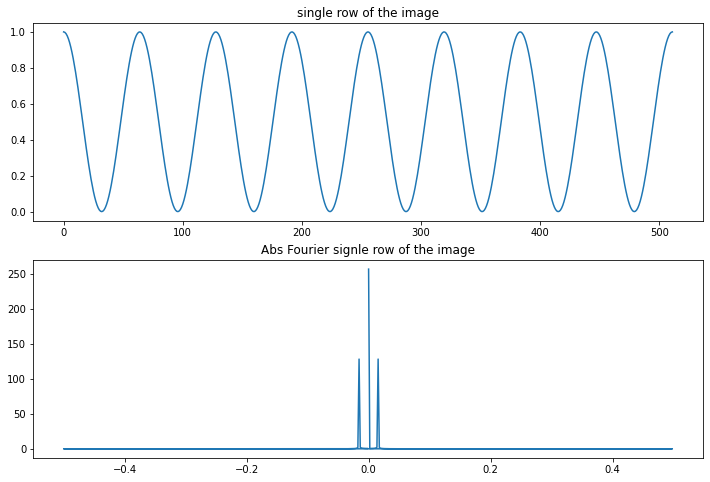

In [77]:
single_row = img[1, :]

plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(single_row)
plt.title('single row of the image')
plt.subplot(212)
plt.plot(fft.fftfreq(N),np.abs(fft.fft(single_row)))
plt.title('Abs Fourier signle row of the image')

### Fourier of  a single column of the image

Text(0.5, 1.0, 'Abs Fourier signle column of the image')

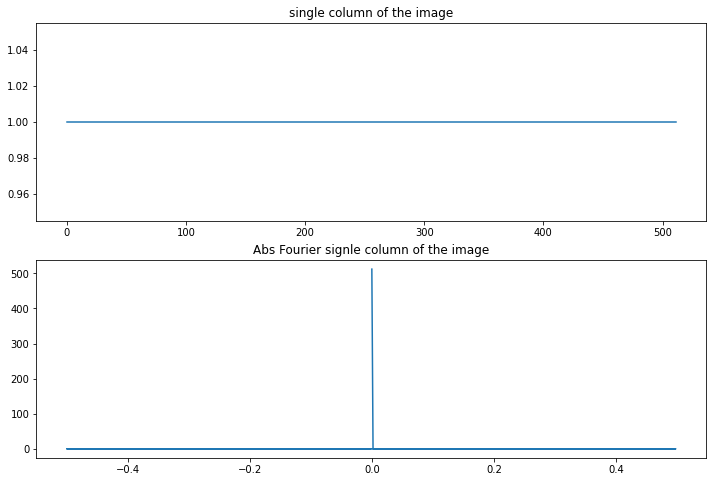

In [78]:
single_col = img[:, 0]

plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(single_col)
plt.title('single column of the image')
plt.subplot(212)
plt.plot(fft.fftfreq(N),np.abs(fft.fft(single_col)))
plt.title('Abs Fourier signle column of the image')

## **Combination of Horizontal and Vertical Sinusoids**


### Create 2D cosine with fx and fy 

In [ ]:
fx = 4
fy = 32
_img = # Your Turn

### View the 2D cosine

Text(0.5, 1.0, 'Mixed waveform')

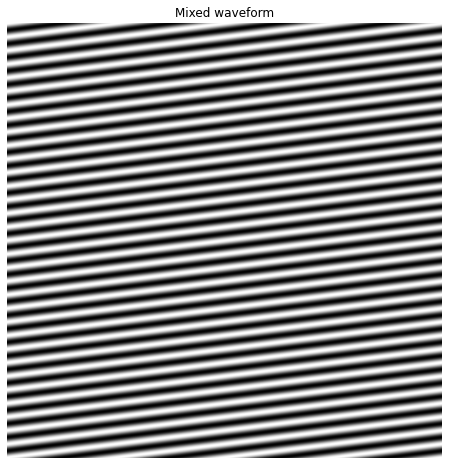

In [175]:
plt.figure(figsize=(12, 8))
plt.imshow(_img)
plt.axis('off')
plt.title('Mixed waveform')

### 2D Fourier Transform on the image 

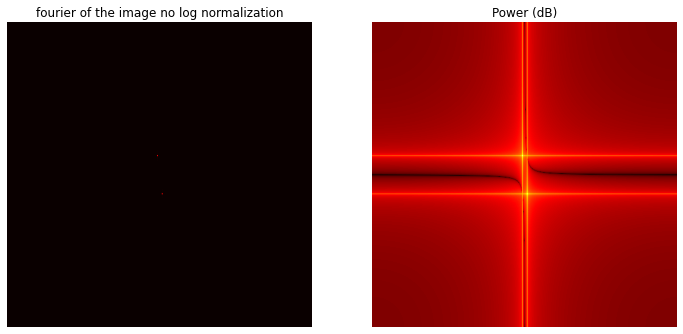

In [176]:
Img = fft.fft2(_img)
mag = np.abs(fft.fftshift(Img))
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(mag * 1e6,cmap='hot'); plt.axis('off')
plt.title('fourier of the image no log normalization')
plt.subplot(122)
plt.imshow(10*np.log10(mag**2 + 0.001), cmap='hot'); plt.axis('off')
plt.title('Power (dB)');

## Fourier on a real life image 

In [201]:
!wget https://i.pinimg.com/236x/b8/08/88/b808881cc9e34c96ed8da89ccf4f2127.jpg -O chess.jpg
!wget https://cdn.britannica.com/53/180553-050-FE609C89/Thinker-Auguste-Rodin-Museum-Paris-1904.jpg -O thinking_man.jpg

--2021-03-13 19:47:16--  https://i.pinimg.com/236x/b8/08/88/b808881cc9e34c96ed8da89ccf4f2127.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.36.84, 2a04:4e42:9::84
Connecting to i.pinimg.com (i.pinimg.com)|151.101.36.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14873 (15K) [image/jpeg]
Saving to: ‘chess.jpg’

chess.jpg           100%[===================>]  14.52K  --.-KB/s    in 0s      

2021-03-13 19:47:16 (92.7 MB/s) - ‘chess.jpg’ saved [14873/14873]

--2021-03-13 19:47:16--  https://cdn.britannica.com/53/180553-050-FE609C89/Thinker-Auguste-Rodin-Museum-Paris-1904.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 54.192.86.123, 54.192.86.43, 54.192.86.6, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|54.192.86.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161566 (158K) [image/jpeg]
Saving to: ‘thinking_man.jpg’

thinking_man.jpg    100%[===================>] 157.78K   908KB/s    in 0.2s    

2021-

### Read the image and apply 2d fourier on the image

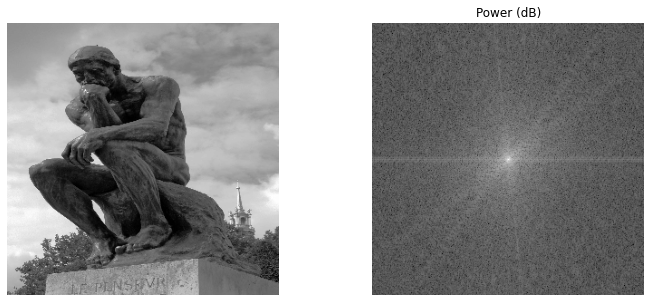

In [353]:
real_img = cv2.resize(cv2.imread('thinking_man.jpg', cv2.IMREAD_GRAYSCALE), (300, 300))
Img = fft.fft2(real_img)
mag = np.abs(fft.fftshift(Img))
plt.subplot(1,2,1)
plt.imshow(real_img); plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(10*np.log10(mag**2 + 1)); plt.axis('off'); plt.title('Power (dB)');

In [398]:
h,w = real_img.shape
x =np.linspace(0, 1, h)
f = 30
y = 0.75 * np.cos(2 * np.pi* f * x + phi) / 2  + 0.625
bars = np.repeat(y, w).reshape(h, w).T
print(y.max(), y.min())

1.0 0.25002069925169357


Text(0.5, 1.0, 'fftshift Fourier free man behind bars')

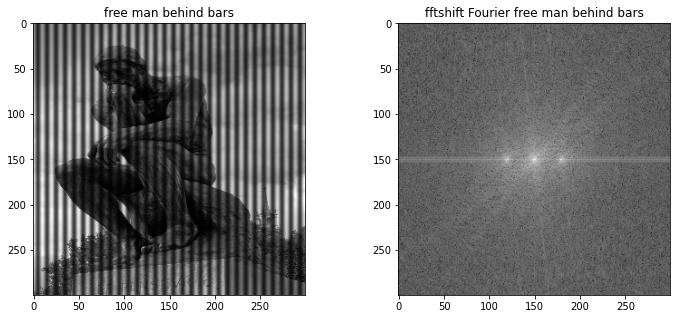

In [399]:
locked_thinking_man = bars * real_img
Img = fft.fft2(locked_thinking_man)
mag = np.abs(Img)
plt.subplot(121)
plt.imshow(locked_thinking_man)
plt.title('free man behind bars')
plt.subplot(122)
plt.imshow(fft.fftshift(10 * np.log10(mag**2 + 1)));  plt.title('Power (dB)');
plt.title('fftshift Fourier free man behind bars')

## **Free the Thinking Man**
 using L1 Norm 

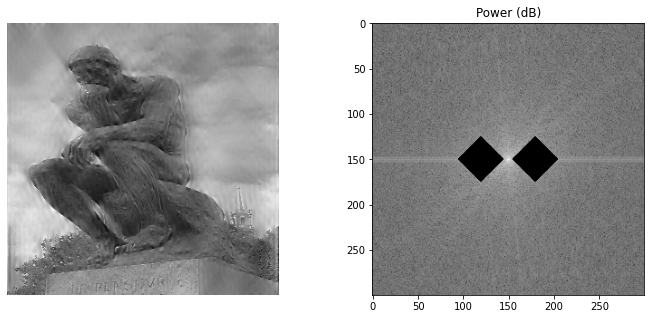

In [402]:
Img = fft.fft2(locked_thinking_man)

x, y = np.meshgrid(range(real_img.shape[0]), range(real_img.shape[1]))
r1 = # Your Turn
r2 = # Your Turn

_Img = np.where((r1 > 25) & (r2 > 25 ), fft.fftshift(Img), 0)
mag = np.abs(_Img)
plt.subplot(1,2,1)
plt.imshow(fft.ifft2(fft.fftshift(_Img)).real); plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(10 * np.log10(mag**2 + 1));  plt.title('Power (dB)');

## Free the thinking man 
using L2 Norm 

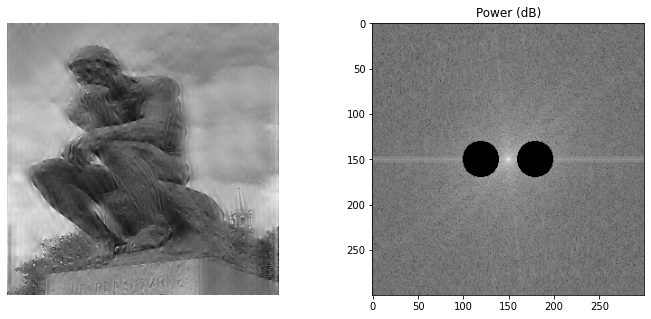

In [406]:
Img = fft.fft2(locked_thinking_man)

x, y = np.meshgrid(range(real_img.shape[0]), range(real_img.shape[1]))
r1 = #Your Turn
r2 = #Your Turn

_Img = np.where((r1 > 20) & (r2 > 20 ), fft.fftshift(Img), 0)
mag = np.abs(_Img)
plt.subplot(1,2,1)
plt.imshow(fft.ifft2(fft.fftshift(_Img)).real); plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(10 * np.log10(mag**2 + 1));  plt.title('Power (dB)');

## sperate Vertical and Horizontal Frequencies

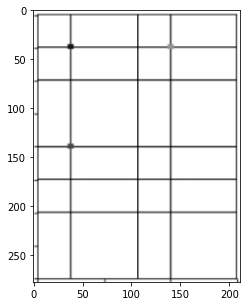

In [139]:
img = plt.imread("drawing.png")
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img)

In [142]:
img_norm = norm(img)
F = fft.fft2(img_norm)

In [148]:
vertical_lines_only_fourier = np.zeros_like(F)
horizontal_lines_only_fourier = np.zeros_like(F)
dots_only_fourier = np.zeros_like(F)
vertical_lines_only_fourier[0,:] = #Your Turn 
horizontal_lines_only_fourier[:,0] = #Your Turn 


In [167]:
new_img_1 = norm(np.abs(fft.ifft2(vertical_lines_only_fourier)))
new_img_2 = norm(np.abs(fft.ifft2(horizontal_lines_only_fourier)))


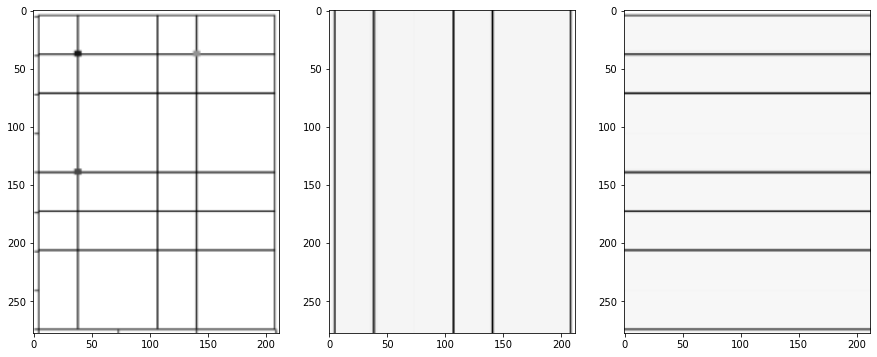

In [170]:
plt.figure(figsize=[15,10])
plt.subplot(131)
plt.imshow(img_norm)
plt.subplot(132)
plt.imshow(new_img_1)
plt.subplot(133)
plt.imshow(new_img_2)